## <center> Evaluate Results </center>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load data
result_LR = pd.read_csv('output/result_LR.csv')
result_SVM_LR = pd.read_csv('output/result_SVM_LR.csv')
result_SVM_RBF = pd.read_csv('output/result_SVM_RBF.csv')
result_DT = pd.read_csv('output/result_DT.csv')
result_EL = pd.read_csv('output/result_EL.csv')
result_DB = pd.read_csv('output/result_DB.csv')

result_df = pd.concat([result_LR, result_SVM_LR, result_SVM_RBF, result_DT, result_EL, result_DB], axis=0)
result_df.reset_index(drop=True, inplace=True)
result_df.head(100)
result_df.to_csv('output/results.csv', index=False)

C:\Users\ceffendy\AppData\Local\Temp\ipykernel_15736\901010220.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['color'] = filtered_df['model'].map(color_map)


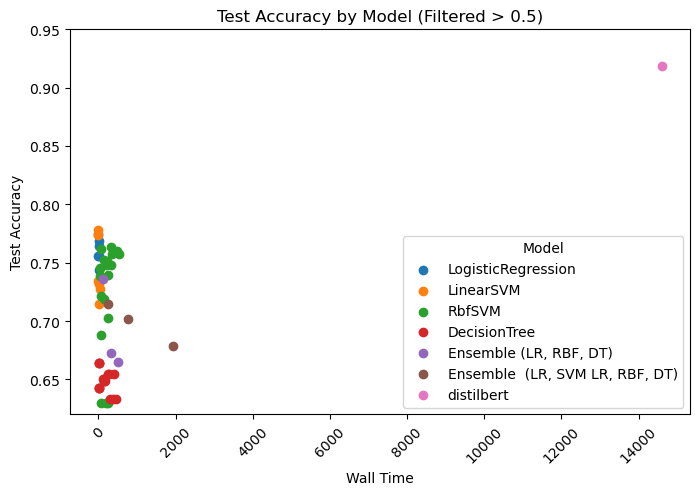

In [3]:
# Filter out rows with test_accuracy below 0.5
filtered_df = result_df[result_df['test_accuracy'] >= 0.5]

# Assign colors to each model
unique_models = filtered_df['model'].unique()
color_map = {model: color for model, color in zip(unique_models, plt.cm.tab10.colors)}
filtered_df['color'] = filtered_df['model'].map(color_map)

# Get the top 5 rows by test accuracy
top_5 = filtered_df.nlargest(5, 'test_accuracy')

# Plot
plt.figure(figsize=(8, 5))
plt.ylim(0.62, 0.95)
for model in unique_models:
    model_data = filtered_df[filtered_df['model'] == model]
    plt.scatter(model_data['wall_time'], model_data['test_accuracy'], label=model, color=color_map[model])

# # Label top 5 points
# for _, row in top_5.iterrows():
#     plt.text(row['wall_time'], row['test_accuracy'], row['task_no'], fontsize=8, ha='left')

plt.title('Test Accuracy by Model (Filtered > 0.5)')
plt.xlabel('Wall Time')
plt.ylabel('Test Accuracy')
plt.xticks(rotation=45)
plt.legend(title='Model', loc='lower right')  # Move the legend to the bottom right

plt.show()